# Advanced Pandas

This lecture covers an array of advanced pandas methods that may be useful as you continue to work on more challenging data science problems. Topics that are covered include:
- Accessor Methods
- Filtering Data
- Changing Data Types
- Apply, Group By
- Merging & Reshaping DataFrames

## Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the googleplaystore.csv data
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/googleplaystore.csv"
goo = pd.read_csv(url)
goo.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
!curl -s -O {url}
# 10472

In [4]:
!ls -la

total 1348
drwxr-xr-x 1 root root    4096 Oct 14 15:49 .
drwxr-xr-x 1 root root    4096 Oct 14 15:44 ..
drwxr-xr-x 4 root root    4096 Oct 10 13:27 .config
-rw-r--r-- 1 root root 1360155 Oct 14 15:49 googleplaystore.csv
drwxr-xr-x 1 root root    4096 Oct 10 13:27 sample_data


In [5]:
!cat -n googleplaystore.csv | tr -s '\r\n' '\n' | grep -C2 'Life Made WI-Fi Touchscreen'

 10472	Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
 10473	Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
 10474	Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,,"February 11, 2018",1.0.19,4.0 and up
 10475	osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
 10476	Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [6]:
goo.shape

(10841, 13)

In [7]:
goo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
filter = ( goo["App"] == "ROBLOX" )
goo[filter]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [9]:
# Make a copy for cleaning
google = goo.copy()

In [10]:
# Take a look at the data types
google.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [11]:
google.select_dtypes(include = ['float64', 'int64'])

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


## Filtering

In [12]:
# Look at values in the 'Installs' column
google['Installs'].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [13]:
filter = ( goo["Installs"] == "Free" )
goo[filter]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
filter.shape

(10841,)

In [15]:
goo.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
google.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
# Let's remove the 'Free' row
# Find row
np.where(google['Installs'] == 'Free')


(array([10472]),)

In [18]:
# Compare with "0+"
# Find row
np.where(google['Installs'] == '0+')[0]


array([4465, 5307, 5486, 5945, 6692, 7434, 8081, 8614, 8871, 9337, 9719,
       9905, 9917, 9934])

In [19]:
# Let's remove the 'Free' row
# Get index value
np.where(goo['Installs'] == 'Free')[0]

array([10472])

In [20]:
# Drop that row
index_filter = ( np.where(goo['Installs'] == 'Free')[0] )
google.drop(index_filter, inplace = True)

In [21]:
# Confirm it dropped by looking at value counts of Installs column
google['Installs'].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


## Accessor Methods

Accessors are used to access methods that correspond to certain data types. We are going to focus on two commonly used accessors:
- `str` (string)
- `dt` (datetime)



### str

In [23]:
google['Price'].info()

<class 'pandas.core.series.Series'>
Index: 10840 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
10840 non-null  object
dtypes: object(1)
memory usage: 169.4+ KB


In [22]:
# Look at the value counts of the Price column
google['Price'].value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
...,...
$19.90,1
$1.75,1
$14.00,1


In [24]:
# Let's remove the $ by replacing $ with a blank string
google['Price'] = google['Price'].str.replace('$', '', regex = False)

In [25]:
# Confirm it worked by looking at the first five rows of the Price column
google['Price'].value_counts()

,count
Price,
0,10040
0.99,148
2.99,129
1.99,73
4.99,72
...,...
19.90,1
1.75,1
14.00,1


In [26]:
goo.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [27]:
google['Installs'].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [28]:
# Remove the + and , from Installs column. Confirm it worked by looking at the first five rows.
google['Installs'] = google['Installs'].str.replace(',','', regex = False)
google['Installs'] = google['Installs'].str.replace('+','', regex = False)
google['Installs'].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


In [29]:
goo.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [30]:
# Look at the first five rows of the Type column
google['Type'].head()

,Type
0,Free
1,Free
2,Free
3,Free
4,Free


In [31]:
# Look at the first five rows of the Type column
google['Type'].value_counts()

,count
Type,
Free,10039
Paid,800


In [32]:
# Make the Type column lowercase
google['Type'] = google['Type'].str.lower()
google['Type'].head()

,Type
0,free
1,free
2,free
3,free
4,free


In [33]:
# Look at the first five rows of the Type column
google['Type'].value_counts()

,count
Type,
free,10039
paid,800


### dt

In [34]:
google.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [35]:
# Look at the Last Updated column
google['Last Updated'].head()

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [36]:
# Change this column to datetime
google['Last Updated'] = pd.to_datetime(google['Last Updated'])
google['Last Updated'].head()

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20


In [37]:
google.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [38]:
# See how many days are in each month
google['Last Updated'].dt.days_in_month

,Last Updated
0,31
1,31
2,31
3,30
4,30
...,...
10836,31
10837,31
10838,31
10839,31


In [39]:
# Extract the year from the datetime object
google['Last Updated'].dt.year

,Last Updated
0,2018
1,2018
2,2018
3,2018
4,2018
...,...
10836,2017
10837,2018
10838,2017
10839,2015


In [40]:
# Extract the month from the datetime object
google['Last Updated'].dt.month

,Last Updated
0,1
1,1
2,8
3,6
4,6
...,...
10836,7
10837,7
10838,1
10839,1


In [41]:
# Extract the month from the datetime object
google['Last Updated'].dt.day_name().value_counts()

,count
Last Updated,
Thursday,1981
Wednesday,1941
Tuesday,1912
Friday,1819
Monday,1784
Saturday,747
Sunday,656


In [42]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  object        
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  object        
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.2+ MB


## Data Types

There are two ways to convert data types:
1. `.astype()` - typically used when the conversion is straightforward
2. `pd.to_numeric()` or `pd.to_datetime()` - has options for you to specify what to do if there is an error in the conversion

In [43]:
# Look at data types
google.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [44]:
google['Installs']

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
...,...
10836,5000
10837,100
10838,1000
10839,1000


In [45]:
# Change Installs column to be integer
google['Installs'] = google['Installs'].astype('int')
google['Installs'].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


In [46]:
# Change Price column to be float
google['Price'] = google['Price'].astype('float')
google['Price'].head()

,Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [47]:
# Look at data types
google.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


## Apply

In [48]:
# See current data types
google.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [49]:
# Separate numeric data
num_google = google.select_dtypes(include = ['float64', 'int64'])
num_google.head()

,Rating,Installs,Price
0,4.1,10000,0.0
1,3.9,500000,0.0
2,4.7,5000000,0.0
3,4.5,50000000,0.0
4,4.3,100000,0.0


In [50]:
num_google.dtypes

,0
Rating,float64
Installs,int64
Price,float64


In [59]:
# Calculate the mean of each column using apply()
num_google.apply(np.mean)

,0
Rating,4.191757e+00
Installs,1.546434e+07
Price,1.027368e+00


In [55]:
num_google.apply(sum)

,0
Rating,NaN
Installs,1.676334e+11
Price,1.113667e+04


In [53]:
num_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9366 non-null   float64
 1   Installs  10840 non-null  int64  
 2   Price     10840 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 338.8 KB


In [56]:
num_google.apply(np.sum)

,0
Rating,3.926000e+04
Installs,1.676334e+11
Price,1.113667e+04


In [57]:
# Calculate the maximum of each column using apply()
num_google.apply(np.max)

,0
Rating,5.000000e+00
Installs,1.000000e+09
Price,4.000000e+02


## Group By

In [60]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [61]:
google["Category"].value_counts()

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [62]:
# Calculate average rating by category
google.groupby(['Category'])['Category'].apply(len).sort_values( ascending=False )

,Category
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [63]:
# Calculate average rating by category
google.groupby('Category')['Rating'].mean()

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769
EDUCATION,4.389032


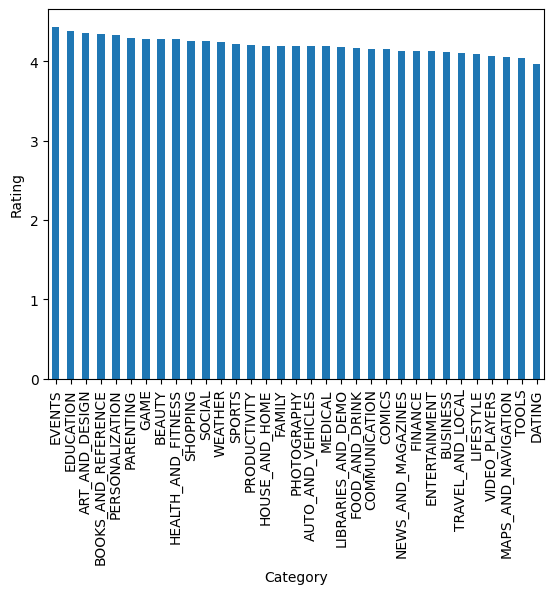

In [66]:
# Let's make a plot!
ratings_by_cat = google.groupby('Category')['Rating'].mean().sort_values( ascending=False)
ratings_by_cat.plot(kind = 'bar')
plt.ylabel('Rating') ;

In [67]:
# Calculate median installs by type
google.groupby('Type')['Installs'].median()

,Installs
Type,
free,100000.0
paid,1000.0


In [68]:
url = "https://www.nmnetlinks.com/_files/ugd/d981c0_517836cde274483fa4a4f75f0350285d.xlsx?dn=Job%20Openings%20-%20January%202024.xlsx"
nmnetlinks = pd.read_excel( url, skiprows=8)
nmnetlinks[:10]

,Date / Posted,Employer,Title,Location,Source of Job Post,Link
0,2024-01-09 00:00:00,AFP-NM Chapter Administrator,Association of Fundraising Professionals,Albuquerque,https://www.groundworksnm.org/jobs,https://community.afpglobal.org/afpnmnewmexico...
1,2024-01-09 00:00:00,Albuquerque Little Theater,Executive Director,Albuquerque,https://www.groundworksnm.org/jobs,https://albuquerquelittletheatre.org/
2,30+ days ago,Albuquerque Public Schools,Manager Foundation and Department Grants,Albuquerque,https://www.indeed.com/,https://www.aps.edu/
3,3 days ago,Albuquerque Regional Economic Alliance,Director of Marketing and Communications,Albuquerque,https://www.indeed.com/,https://www.abq.org/
4,30+ days ago,"Alzheimer's Association, New Mexico Chapter",Executive Director,Albuquerque,https://www.groundworksnm.org/jobs,https://www.alz.org/
5,30+ days ago,Ambercare,Agency Director,Albuquerque,https://www.indeed.com/,https://ambercare.com/
6,28 days ago,American Heart Association,"Senior Vice President, Development",Albuquerque,https://www.indeed.com/,https://www.heart.org/en/
7,2 days ago,Animal Humane New Mexico,Education Outreach Manager,Albuquerque,https://www.indeed.com/,https://animalhumanenm.org/
8,30+ days ago,ASM Global,Booking & Box Office Manager,Albuquerque,https://www.indeed.com/,https://www.asmglobal.com/
9,1 week ago,Buffalo Design Architects,Marketing Director,Albuquerque,https://www.linkedin.com/jobs/,https://www.buffaloarch.com/


In [69]:
nmnetlinks["Link"].value_counts()

,count
Link,
https://www.hurtcallbert.com/careers/,9
https://www.cabq.gov/main-navigation/jobs,8
https://www.slfcu.org/,5
https://www.summit.com/job-board,3
https://www.cnm.edu/depts/hr/apply-for-jobs-at-cnm,3
https://www.sandiacasino.com/,2
https://www.fidelity.com/,2
https://meowwolf.com/careers,2
https://unmjobs.unm.edu/,2


In [74]:
nmnetlinks.groupby(['Location'])['Link'].apply(len).sort_values( ascending = False )

,Link
Location,
Albuquerque,72
1,2
17,2
Rio Rancho,2
Santa Fe,2
0,1
2,1
5,1
7,1


## Merging Data Frames

In [75]:
# Read in googleplaystore_user_reviews.csv
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/googleplaystore_user_reviews.csv"
rev = pd.read_csv(url)
rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [76]:
rev.shape

(64295, 5)

In [77]:
# Look at google dataframe
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [78]:
google["App"].value_counts().head()

,count
App,
ROBLOX,9
"CBS Sports App - Scores, News, Stats & Watch Live",8
ESPN,7
Duolingo: Learn Languages Free,7
Candy Crush Saga,7


In [79]:
rev["App"].value_counts().head()

,count
App,
Angry Birds Classic,320
"CBS Sports App - Scores, News, Stats & Watch Live",320
Bowmasters,320
8 Ball Pool,300
Helix Jump,300


In [80]:
# Combine dataframes using pd.merge.
# Note: there are a lot of options you can change in pd.merge()
google_and_rev = pd.merge(google, rev, on = 'App')
google_and_rev.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [81]:
google.shape

(10840, 13)

In [92]:
(google['App'] == "CBS Sports App - Scores, News, Stats & Watch Live").sum()

8

In [82]:
rev.shape

(64295, 5)

In [93]:
(rev['App'] == "CBS Sports App - Scores, News, Stats & Watch Live").sum()

320

In [83]:
google_and_rev.shape

(122662, 17)

In [94]:
(google_and_rev['App'] == "CBS Sports App - Scores, News, Stats & Watch Live").sum()

2560

In [ ]:
google_and_rev["App"].value_counts().head()

In [84]:
8*320

2560

In [85]:
data1 = {'ID': [1, 2, 3]}
df1 = pd.DataFrame(data1)
df1


,ID
0,1
1,2
2,3


In [86]:
# Create the second DataFrame
data2 = {'Name': ['A', 'B', 'C']}
df2 = pd.DataFrame(data2)
df2


,Name
0,A
1,B
2,C


In [87]:
# Perform a cross join
cross_join = df1.assign(key=1).merge(df2.assign(key=1), on='key').drop('key', axis=1)

cross_join


,ID,Name
0,1,A
1,1,B
2,1,C
3,2,A
4,2,B
5,2,C
6,3,A
7,3,B
8,3,C


## Reshaping DataFrames

In [95]:
# Extract the first 10 rows of the google_and_rev dataframe
first_10 = google_and_rev.iloc[:10].copy()
first_10

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,omgggggg,Neutral,0.000,0.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It cute.,Positive,0.500,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love,Positive,0.500,0.600000


In [96]:
# Transpose the data set
first_10_t = first_10.T
first_10_t

,0,1,2,3,4,5,6,7,8,9
App,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana,Coloring book moana
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9
Reviews,967,967,967,967,967,967,967,967,967,967
Size,14M,14M,14M,14M,14M,14M,14M,14M,14M,14M
Installs,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000
Type,free,free,free,free,free,free,free,free,free,free
Price,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Content Rating,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone,Everyone
Genres,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play,Art & Design;Pretend Play


In [97]:
google.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Rating,9366.0,4.191757,1.0,4.0,4.3,4.5,5.0,0.515219
Installs,10840.0,15464338.882565,0.0,1000.0,100000.0,5000000.0,1000000000.0,85029361.395467
Price,10840.0,1.027368,0.0,0.0,0.0,0.0,400.0,15.949703
Last Updated,10840,2017-11-21 06:43:02.435424256,2010-05-21 00:00:00,2017-09-20 00:00:00,2018-05-24 00:00:00,2018-07-20 00:00:00,2018-08-08 00:00:00,NaN


In [98]:
google.query?

In [99]:
(
  google
    .describe()
    .transpose()
    .query("count < 10000")
)

,count,mean,min,25%,50%,75%,max,std
Rating,9366.0,4.191757,1.0,4.0,4.3,4.5,5.0,0.515219


In [101]:
# Detect positive skew
pd.set_option('display.precision', 2)
(
  google
    .describe()
    .transpose()
    .astype({"count": int})
    .rename({"50%":"median"}, axis = 1)
    .query("mean > median")
)

,count,mean,min,25%,median,75%,max,std
Installs,10840,15464338.88,0.0,1000.0,100000.0,5000000.0,1000000000.0,85029361.4
Price,10840,1.03,0.0,0.0,0.0,0.0,400.0,15.95


In [102]:
google.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Rating,9366.0,4.19,1.0,4.0,4.3,4.5,5.0,0.52
Installs,10840.0,15464338.88,0.0,1000.0,100000.0,5000000.0,1000000000.0,85029361.4
Price,10840.0,1.03,0.0,0.0,0.0,0.0,400.0,15.95
Last Updated,10840,2017-11-21 06:43:02.435424256,2010-05-21 00:00:00,2017-09-20 00:00:00,2018-05-24 00:00:00,2018-07-20 00:00:00,2018-08-08 00:00:00,NaN


Other methods:
- pivot()
- pivot_table()
- melt()
- stack()
- unstack()
- explode()
- get_dummies()


References

https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086
https://medium.com/@tamoghnasaha.22/all-you-really-need-to-know-python-notebook-advanced-pandas-da1697aee647

In [103]:
len([ x for x in dir(pd.DataFrame) if not x.startswith("_") ])

209

In [104]:
len([ x for x in dir(pd.Series) if not x.startswith("_") ])

210

In [105]:
len([ x for x in dir(np.ndarray) if not x.startswith("_") ])

71